In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
appl_data = pd.read_pickle('metrics_AAPL.pkl')
googl_data = pd.read_pickle('metrics_GOOG.pkl')
msft_data = pd.read_pickle('metrics_MSFT.pkl')

### AAPL Data

In [ ]:
appl_data.columns

Index(['Sharpe Ratio', 'Annualized Return', 'Max Drawdown', 'Volatility',
       'Total Number of Trades', '%win', 'Net Profit', 'Profit Factor',
       'Average Trade Net Profit', 'Average Time in Trades',
       'Avg Time Won Trades', 'Avg Time Lost Trades', 'Average Won Trade',
       'Average Lost Trade', 'Average Trade Ratio', 'start_time', 'end_time',
       'commission_per_share', 'slippage_per_share', 'symbol'],
      dtype='object')

In [26]:
appl_data.head()

,Sharpe Ratio,Annualized Return,Max Drawdown,Volatility,Total Number of Trades,%win,Net Profit,Profit Factor,Average Trade Net Profit,Average Time in Trades,Avg Time Won Trades,Avg Time Lost Trades,Average Won Trade,Average Lost Trade,Average Trade Ratio,start_time,end_time,commission_per_share,slippage_per_share,symbol
0,1.7529,0.0353,-0.0019,0.0199,11,54.55%,104.12,1.2850,£9.47,1618.89 hrs,2360.0 hrs,729.55 hrs,£78.25,£73.07,1.0708,1900-01-01 05:00:00,09:00:00,0.05,0.03,AAPL
1,3.0657,0.0493,-0.0015,0.0157,14,50.0%,183.87,1.5862,£13.13,1270.29 hrs,2067.46 hrs,473.11 hrs,£71.08,£44.81,1.5862,1900-01-01 05:15:00,09:15:00,0.05,0.03,AAPL
2,-2.2671,-0.0265,-0.0038,0.0118,46,41.3%,-338.30,0.7284,£-7.35,406.98 hrs,620.36 hrs,256.82 hrs,£47.75,£46.13,1.0351,1900-01-01 05:30:00,09:30:00,0.05,0.03,AAPL
3,-0.7696,-0.0054,-0.0055,0.0070,133,39.1%,-199.30,0.8879,£-1.5,151.05 hrs,250.61 hrs,87.13 hrs,£30.36,£21.95,1.3831,1900-01-01 05:45:00,09:45:00,0.05,0.03,AAPL
4,-0.6691,-0.0043,-0.0073,0.0063,165,37.58%,-192.93,0.9005,£-1.17,122.19 hrs,201.64 hrs,74.36 hrs,£28.16,£18.83,1.4960,1900-01-01 06:00:00,10:00:00,0.05,0.03,AAPL


In [ ]:
appl_data['Net Profit'] = (appl_data['Net Profit'].replace('[£,]', '', regex=True).astype(float))
print(f"AAPL minimum net profit/biggest loss: {appl_data['Net Profit'].min()}")
print(f"AAPL maximum net profit: {appl_data['Net Profit'].max()}")

AAPL minimum net profit/biggest loss: -706.39
AAPL maximum net profit: 183.87


In [16]:
appl_data['start_time'] = pd.to_datetime(appl_data['start_time'], format='%H:%M:%S')

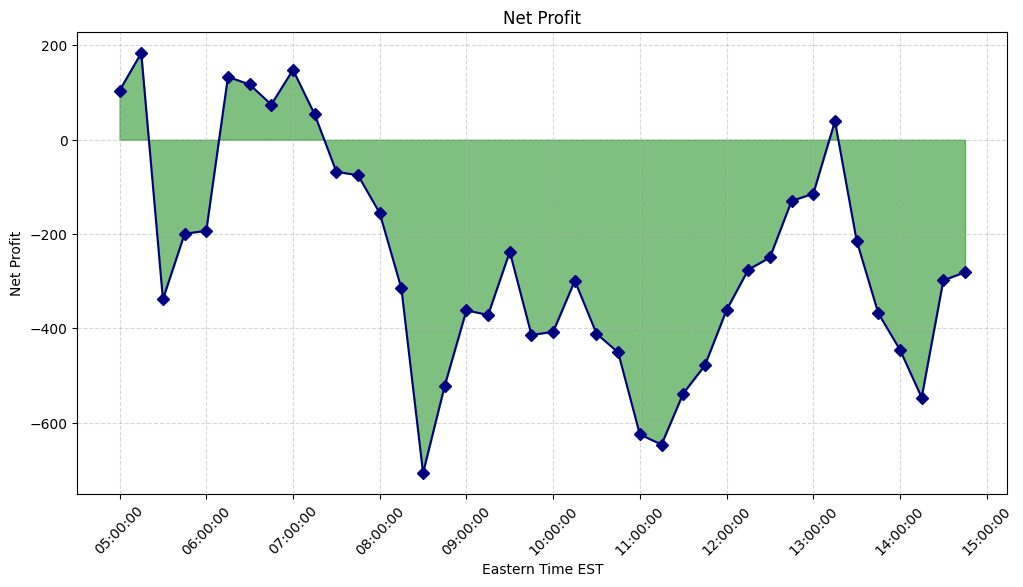

In [25]:
# Plot
plt.figure(figsize=(12,6))
plt.plot(appl_data['start_time'], appl_data['Net Profit'], marker='D', color='navy')
# Fill under the curve
plt.fill_between(appl_data['start_time'], appl_data['Net Profit'], color='green', alpha=0.5)

# Labels and title
plt.title('Net Profit')
plt.xlabel('Eastern Time EST')
plt.ylabel('Net Profit')

# Format x-axis to show HH:MM
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%H:%M:%S'))
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

The APPL stock produces very minimal profits within the first few hours of the 6:15am to 10:15 am 4 hour window. This isnt a promising result.

### GOOGLE Trade data

In [ ]:
googl_data['Net Profit'] = (googl_data['Net Profit'].replace('[£,]', '', regex=True).astype(float))
print(f"GOOGL minimum net profit/biggest loss: {googl_data['Net Profit'].min()}")
print(f"GOOGL maximum net profit: {googl_data['Net Profit'].max()}")

GOOGL minimum net profit/biggest loss: -476.19
GOOGL maximum net profit: 320.58


In [20]:
googl_data['start_time'] = pd.to_datetime(googl_data['start_time'], format='%H:%M:%S')

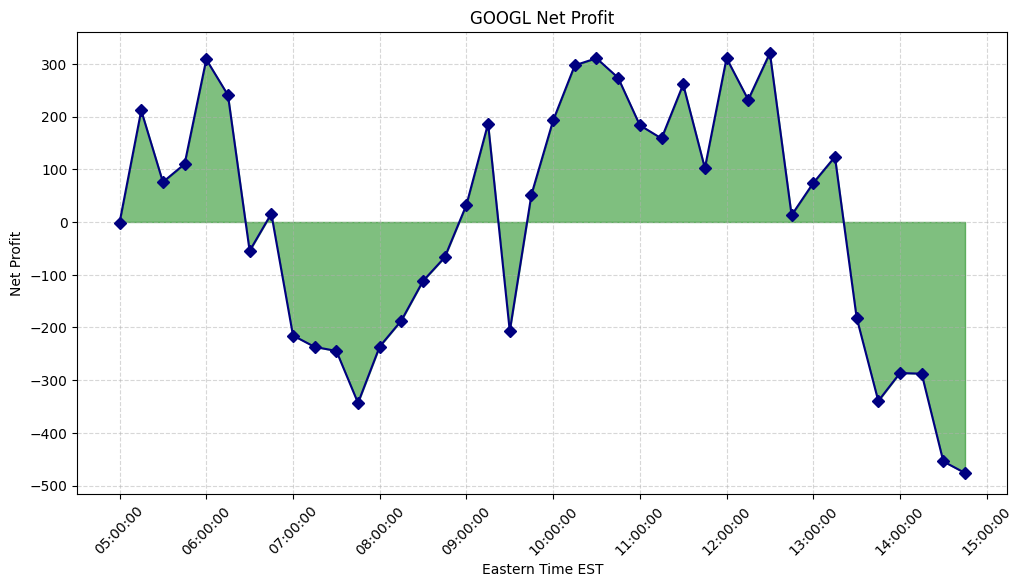

In [21]:
# Plot
plt.figure(figsize=(12,6))
plt.plot(googl_data['start_time'], googl_data['Net Profit'], marker='D', color='navy')
# Fill under the curve
plt.fill_between(googl_data['start_time'], googl_data['Net Profit'], color='green', alpha=0.5)

# Labels and title
plt.title('GOOGL Net Profit')
plt.xlabel('Eastern Time EST')
plt.ylabel('Net Profit')

# Format x-axis to show HH:MM
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%H:%M:%S'))
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

On the EST time frame, initial 75% of trades taken between 9:45am to 1:45pm trading window ends up more profitable than than the rest. we will take up this range as our entry time range.

### MSFT Data

In [22]:
msft_data['Net Profit'] = (msft_data['Net Profit'].replace('[£,]', '', regex=True).astype(float))
print(f"MSFT minimum net profit/biggest loss: {msft_data['Net Profit'].min()}")
print(f"MSFT maximum net profit: {msft_data['Net Profit'].max()}")

MSFT minimum net profit/biggest loss: -874.26
MSFT maximum net profit: 64.32


In [23]:
msft_data['start_time'] = pd.to_datetime(msft_data['start_time'], format='%H:%M:%S')

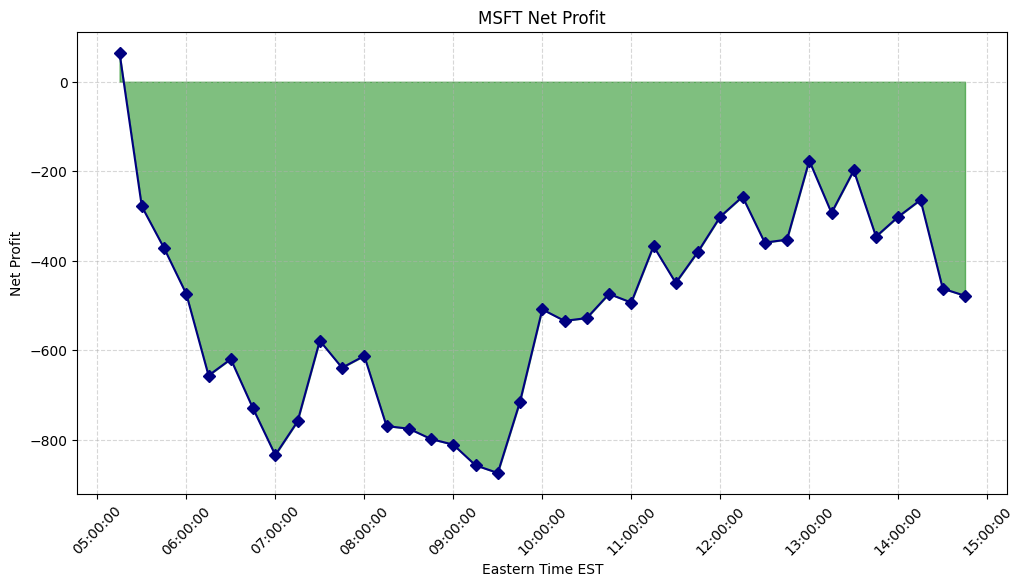

In [24]:
# Plot
plt.figure(figsize=(12,6))
plt.plot(msft_data['start_time'], msft_data['Net Profit'], marker='D', color='navy')
# Fill under the curve
plt.fill_between(msft_data['start_time'], msft_data['Net Profit'], color='green', alpha=0.5)

# Labels and title
plt.title('MSFT Net Profit')
plt.xlabel('Eastern Time EST')
plt.ylabel('Net Profit')

# Format x-axis to show HH:MM
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%H:%M:%S'))
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

The MSFT stock has no prospect.